In [1]:
# import packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read file 
dfx = pd.read_csv('../csv_files/p4no_skew.csv', index_col=0)
dfx.head()

,C1,C4,C7,C3p,C5p,C6p,T4p,T3p,T5p,S1p,S2p,S3p,C2
0,2.227033,0.029074,1.927893,0,1.351792,1.493802,0.640426,0.984202,0.615270,0.169556,0.209529,0.221915,1.0
1,2.524740,-0.013352,1.720483,1,2.487306,0.000000,0.644753,0.982361,0.609752,0.148247,0.223103,0.221556,0.0
2,2.116933,0.020715,1.395264,1,1.214656,0.000000,0.636816,0.984287,0.628717,0.226322,0.184411,0.225078,1.0
3,2.436077,0.020023,1.429303,1,1.193831,0.000000,0.539634,0.985673,0.628490,0.213167,0.192593,0.237040,1.0
4,2.075782,-0.034895,2.929681,0,1.315407,1.307660,0.587413,0.980484,0.603993,0.165315,0.215782,0.224143,1.0


In [3]:
# separate out binary variables 
# they do not need to be normalized or standardized
dfbinary = dfx.filter(['C2', 'C3p'])
dfbinary.head()

,C2,C3p
0,1.0,0
1,0.0,1
2,1.0,1
3,1.0,1
4,1.0,0


In [4]:
# drop binary variables from the working dataframe 
dfx = dfx.drop(labels=['C2', 'C3p'],axis=1)
dfx.head()

,C1,C4,C7,C5p,C6p,T4p,T3p,T5p,S1p,S2p,S3p
0,2.227033,0.029074,1.927893,1.351792,1.493802,0.640426,0.984202,0.615270,0.169556,0.209529,0.221915
1,2.524740,-0.013352,1.720483,2.487306,0.000000,0.644753,0.982361,0.609752,0.148247,0.223103,0.221556
2,2.116933,0.020715,1.395264,1.214656,0.000000,0.636816,0.984287,0.628717,0.226322,0.184411,0.225078
3,2.436077,0.020023,1.429303,1.193831,0.000000,0.539634,0.985673,0.628490,0.213167,0.192593,0.237040
4,2.075782,-0.034895,2.929681,1.315407,1.307660,0.587413,0.980484,0.603993,0.165315,0.215782,0.224143


**Check if process works with one column**

In [5]:
my_col = dfx['C1']
my_col.head()

0    2.227033
1    2.524740
2    2.116933
3    2.436077
4    2.075782
Name: C1, dtype: float64

In [6]:
# define upper boundary
u_bound = my_col.mean() + 3* my_col.std()
print(u_bound)

2.975333116663967


In [7]:
# which records are above the upper boundary
my_col[my_col>u_bound]

65     3.574816
141    3.067427
228    3.089133
391    3.316625
413    3.004782
628    3.063733
665    3.289497
Name: C1, dtype: float64

In [8]:
# replace outliers with upper boundary
my_col[my_col>u_bound] = u_bound

In [9]:
# check
pd.Series(my_col>u_bound).value_counts()

False    682
Name: C1, dtype: int64

In [10]:
# another check
my_col[my_col>u_bound]

Series([], Name: C1, dtype: float64)

In [11]:
# define lower boundary 
l_bound = my_col.mean() - 3* my_col.std()
print(l_bound)

1.5019178597752965


In [12]:
# which records are under the lower boundary
my_col[my_col<l_bound]

148    1.491301
575    1.467799
589    1.467799
Name: C1, dtype: float64

In [13]:
# replace outliers with lower boundary
my_col[my_col<l_bound] = l_bound

In [14]:
# check
pd.Series(my_col<l_bound).value_counts()

False    682
Name: C1, dtype: int64

In [15]:
# another check
my_col[my_col<l_bound]

Series([], Name: C1, dtype: float64)

**All Columns Upper**

In [16]:
for col in dfx.columns:
    u_bound = dfx[col].mean() + 3* dfx[col].std()
    dfx[col][dfx[col] > u_bound] = u_bound

In [17]:
# check
pd.Series(dfx[col][dfx[col]] > u_bound).value_counts()

False    682
Name: S3p, dtype: int64

**All Columns Lower**

In [18]:
for col in dfx.columns:
    l_bound = dfx[col].mean() - 3* dfx[col].std()
    dfx[col][dfx[col] < l_bound] = l_bound

In [19]:
# check
pd.Series(dfx[col][dfx[col]] < l_bound).value_counts()

False    682
Name: S3p, dtype: int64

**Verifying that outliers were removed**

whis = 'range' allows the whiskers of the plot to encompass all values up until the upper and lower bounds 

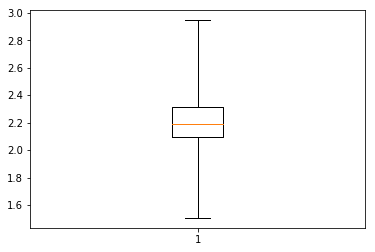

In [20]:
plt.boxplot(dfx['C1'], whis='range')
plt.show()

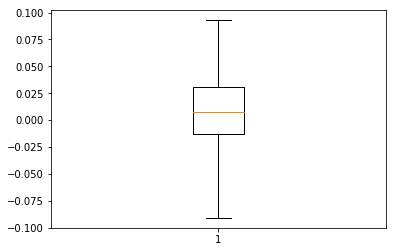

In [21]:
plt.boxplot(dfx['C4'], whis='range')
plt.show()

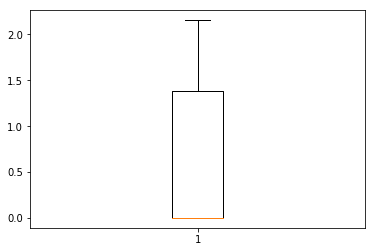

In [22]:
plt.boxplot(dfx['C6p'], whis='range')
plt.show()

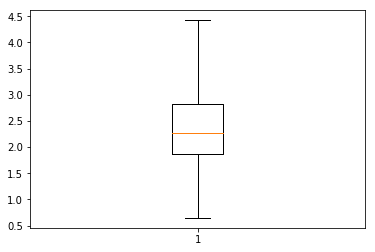

In [23]:
plt.boxplot(dfx['C7'], whis='range')
plt.show()

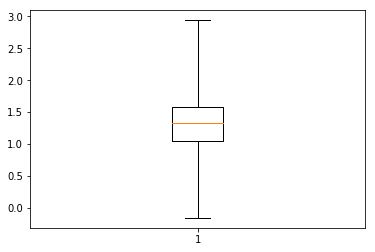

In [24]:
plt.boxplot(dfx['C5p'], whis='range')
plt.show()

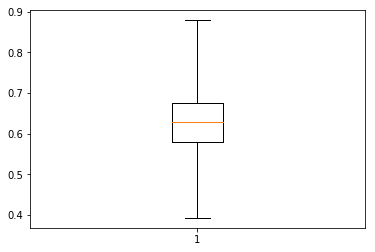

In [25]:
plt.boxplot(dfx['T4p'], whis='range')
plt.show()

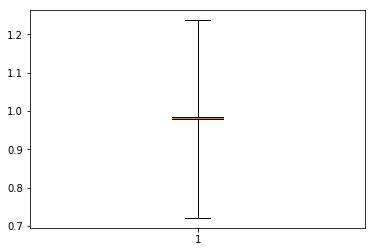

In [26]:
plt.boxplot(dfx['T3p'], whis='range')
plt.show()

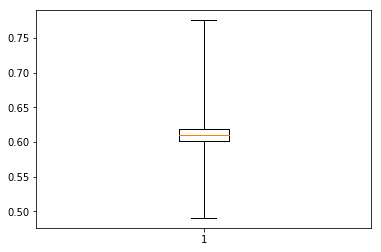

In [27]:
plt.boxplot(dfx['T5p'], whis='range')
plt.show()

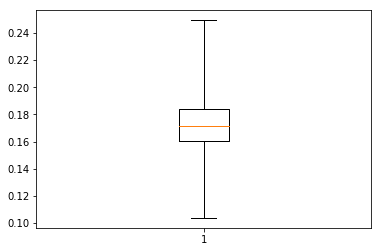

In [28]:
plt.boxplot(dfx['S1p'], whis='range')
plt.show()

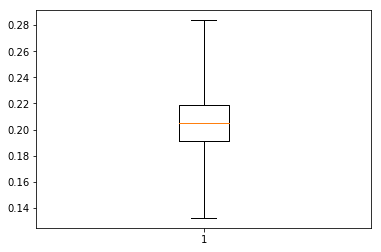

In [29]:
plt.boxplot(dfx['S2p'], whis='range')
plt.show()

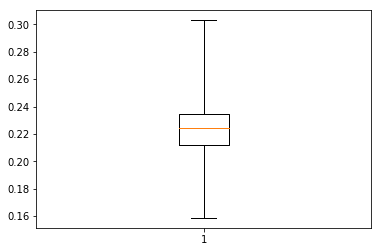

In [30]:
plt.boxplot(dfx['S3p'], whis='range')
plt.show()

In [31]:
# concat binary variables back in with the main dataframe 
dfx = pd.concat([dfx, dfbinary], axis=1)
dfx.head()

,C1,C4,C7,C5p,C6p,T4p,T3p,T5p,S1p,S2p,S3p,C2,C3p
0,2.227033,0.029074,1.927893,1.351792,1.493802,0.640426,0.984202,0.615270,0.169556,0.209529,0.221915,1.0,0
1,2.524740,-0.013352,1.720483,2.487306,0.000000,0.644753,0.982361,0.609752,0.148247,0.223103,0.221556,0.0,1
2,2.116933,0.020715,1.395264,1.214656,0.000000,0.636816,0.984287,0.628717,0.226322,0.184411,0.225078,1.0,1
3,2.436077,0.020023,1.429303,1.193831,0.000000,0.539634,0.985673,0.628490,0.213167,0.192593,0.237040,1.0,1
4,2.075782,-0.034895,2.929681,1.315407,1.307660,0.587413,0.980484,0.603993,0.165315,0.215782,0.224143,1.0,0


In [32]:
dfx.to_csv('../csv_files/p4stdev.csv')